In [281]:
from sklearn.cross_validation import cross_val_score

from sklearn.cross_validation import KFold

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

## Data Import and Pre-Preocessing ##

In [282]:
df = pd.read_csv('/Users/homayounsadri/Documents/Education/Stevens/Courses/BIA_662_Cognative Computing/Final Project/dataset_diabetes/diabetic_data.csv')
df.shape

(101766, 50)

In [270]:
features = [ 'race','gender', 'admission_type_id',
 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
 'max_glu_serum', 'A1Cresult','change', 'diabetesMed']

targets = ['readmitted']

X = df[features]
y = df[targets]


In [271]:
X['race'] = pd.factorize(X['race'])[0]
X['gender'] = pd.factorize(X['gender'])[0]
X['max_glu_serum'] = pd.factorize(X['max_glu_serum'])[0]
X['A1Cresult'] = pd.factorize(X['A1Cresult'])[0]
X['change'] = pd.factorize(X['change'])[0]
X['diabetesMed'] = pd.factorize(X['diabetesMed'])[0]

y['readmitted'] = pd.factorize(y['readmitted'])[0]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

## Train-Test Split##

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.5, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state=1)

## KNN Baseline

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


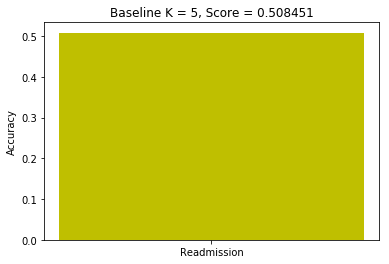

In [283]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


score=metrics.accuracy_score(y_test[targets], y_pred)

plt.bar('Readmission',score,color='y')
plt.ylabel('Accuracy')
plt.title('Baseline K = 5, Score = %f'%score)
plt.show()

## KNN Feature Tuning

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


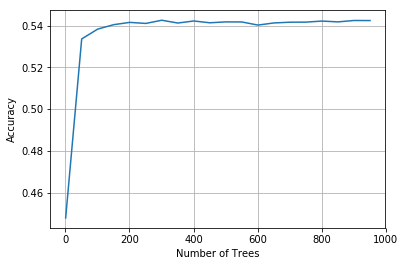

In [210]:
# try K=1 through K=1000 and record testing accuracy
k_range = range(1,1000,50)
score_over_k =[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_cv)
     
    score= metrics.accuracy_score(y_cv[targets], y_pred)
    score_over_k.append(score)
    
    
plt.plot(k_range,score_over_k)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/matplotlib/legend.py:623: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/local/lib/python3.6/site-packages/matplotlib/legend.py:623: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/local/lib/python3.6/site-packages/matplotlib/legend.py:623: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/l

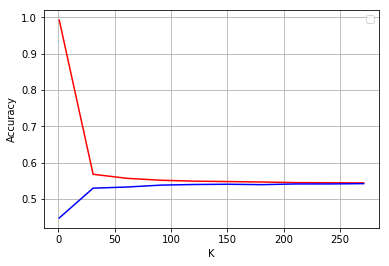

In [261]:
k_range = range(1,300,30)

score_over_train =[]
score_over_cv = []

# we don't expect the score diverge, b.c. we're reducing the complexity of model, like k in knn

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i)

    knn = knn.fit(X_train, y_train)

    y_pred_cv = knn.predict(X_cv)

    score_cv = metrics.accuracy_score(y_cv[targets], y_pred_cv)
    
    y_pred_train = knn.predict(X_train)
    
    score_train = metrics.accuracy_score(y_train[targets], y_pred_train)
    
    score_over_train.append(score_train)
    score_over_cv.append(score_cv)

plt.plot(k_range,score_over_train,'r',k_range,score_over_cv,'b')
plt.legend('train','cross validation')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

## KNN Optimized

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


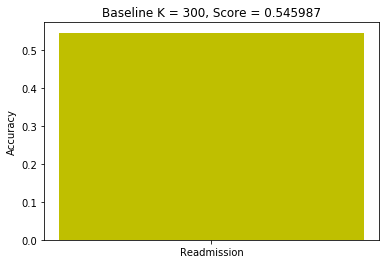

In [284]:
knn = KNeighborsClassifier(n_neighbors=300)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


score=metrics.accuracy_score(y_test[targets], y_pred)
plt.bar('Readmission',score,color='y')
plt.ylabel('Accuracy')
plt.title('Baseline K = 300, Score = %f'%score)
plt.show()

## Random Forest Baseline

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


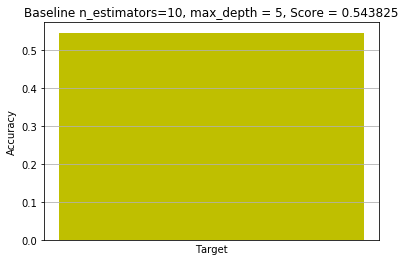

In [267]:
#Need to run the split right before

clf_rf = RandomForestClassifier(n_estimators=10, max_depth = 5)

clf_rf = clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)

y_pred.shape


score=metrics.accuracy_score(y_test[targets], y_pred)
plt.bar('Readmission',score,color='y')
plt.ylabel('Accuracy')
plt.title('Baseline n_estimators=10, max_depth = 5, Score = %f'%score)

plt.grid()
plt.show()

## Randon Forest - Feature Tuning 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

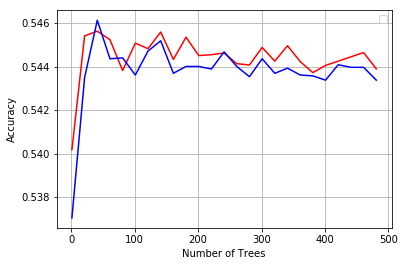

In [257]:
i_range = range(1,500,20)

score_over_train =[]
score_over_cv = []

# we don't expect the score diverge, b.c. we're reducing the complexity of model, like k in knn

for i in i_range:
    clf_rf = RandomForestClassifier(n_estimators= i, max_depth = 7)

    clf_rf = clf_rf.fit(X_train, y_train)

    y_pred_cv = clf_rf.predict(X_cv)

    score_cv=metrics.accuracy_score(y_cv[targets], y_pred_cv)
    
    y_pred_train = clf_rf.predict(X_train)
    
    score_train=metrics.accuracy_score(y_train[targets], y_pred_train)
    
    score_over_train.append(score_train)
    score_over_cv.append(score_cv)

plt.plot(i_range,score_over_train,'r',i_range,score_over_cv,'b')
plt.legend('train','cross validation')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/loc

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/loc

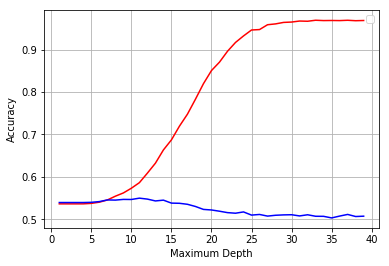

In [245]:
i_range = range(1,40)

score_over_train =[]
score_over_cv = []

for i in i_range:
    clf_rf = RandomForestClassifier(n_estimators= 10, max_depth = i)

    clf_rf = clf_rf.fit(X_train, y_train)

    y_pred_cv = clf_rf.predict(X_cv)

    score_cv=[metrics.accuracy_score(y_cv[targets], y_pred_cv)]
    
    y_pred_train = clf_rf.predict(X_train)
    
    score_train=[metrics.accuracy_score(y_train[targets], y_pred_train)]
    
    score_over_train.append(score_train)
    score_over_cv.append(score_cv)

plt.plot(i_range,score_over_train,'r',i_range,score_over_cv,'b')
plt.legend('train','cross validation')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Random Forest Optimized

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



Predictor  readmitted
             precision    recall  f1-score   support

          0       0.57      0.90      0.70     13843
          1       0.47      0.19      0.27      8788
          2       0.18      0.00      0.00      2811

avg / total       0.49      0.56      0.47     25442



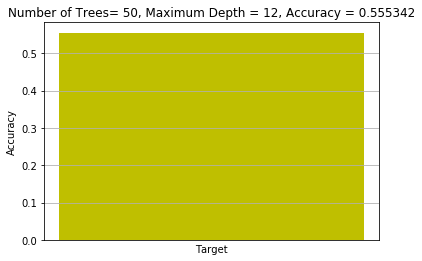

In [260]:
clf_rf = RandomForestClassifier(n_estimators= 50, max_depth = 12)

clf_rf = clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)

#y_pred.shape


for i in range(len(targets)):
    print("\nPredictor ", targets[i])
    print(metrics.classification_report(y_test[targets], y_pred))

score=[metrics.accuracy_score(y_test[targets], y_pred)]
index=np.arange(len(targets))
label=list(targets)
plt.bar(index,score,color='y')
plt.xticks(index+0.5, label, rotation='horizontal')
plt.xlabel('Target')
plt.ylabel('Accuracy')
plt.title('Number of Trees= 50, Maximum Depth = 12, Accuracy = %f'%np.mean(score))
plt.grid()
plt.show()

## Features Importance

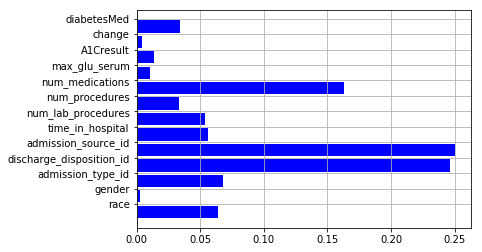

In [278]:
a = clf_rf.feature_importances_

index=np.arange(len(a))
label=list(X)
plt.barh(index,a,color='b')
plt.yticks(index+0.5, label, rotation='horizontal')
plt.grid()
plt.show()